In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Analyst/basket_analysis.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
print(df)

     Unnamed: 0  Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream  \
0             0  False   True   False   False   True   True  False       True   
1             1  False  False   False   False  False  False  False      False   
2             2   True  False    True   False  False   True  False       True   
3             3  False  False    True    True  False   True  False      False   
4             4   True   True   False   False  False  False  False      False   
..          ...    ...    ...     ...     ...    ...    ...    ...        ...   
994         994  False   True   False   False  False  False   True      False   
995         995   True  False   False   False   True  False  False      False   
996         996   True  False   False   False   True   True  False      False   
997         997  False  False    True    True   True  False   True       True   
998         998  False  False   False   False  False  False  False      False   

     Kidney Beans   Milk  N

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.drop(df.columns[0],axis=1,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
print(df)

     Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream  \
0    False   True   False   False   True   True  False       True   
1    False  False   False   False  False  False  False      False   
2     True  False    True   False  False   True  False       True   
3    False  False    True    True  False   True  False      False   
4     True   True   False   False  False  False  False      False   
..     ...    ...     ...     ...    ...    ...    ...        ...   
994  False   True   False   False  False  False   True      False   
995   True  False   False   False   True  False  False      False   
996   True  False   False   False   True   True  False      False   
997  False  False    True    True   True  False   True       True   
998  False  False   False   False  False  False  False      False   

     Kidney Beans   Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
0           False  False   False  False   True    False    True       True  
1           False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(999, 16)

**We have 999 basket for us to compute the recommendation for each item that sold in the store. There are 16 items that sold in the shop.**

In [7]:
df.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Apple           0.383383
Bread           0.384384
Butter          0.420420
Cheese          0.404404
Corn            0.407407
Dill            0.398398
Eggs            0.384384
Ice cream       0.410410
Kidney Beans    0.408408
Milk            0.405405
Nutmeg          0.401401
Onion           0.403403
Sugar           0.409409
Unicorn         0.389389
Yogurt          0.420420
chocolate       0.421421
dtype: float64

**The sale transaction or count for each unique item approximately for this sample. We will dive into and see whether there is any difference or correlation between the baskets. Since the dataframe is already tabulated one hot data frame, we will straight away and use the dataset to be analyzed with apriori**

In [8]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
691,0.098098,"(Onion, chocolate, Yogurt)"
692,0.087087,"(Unicorn, Yogurt, Sugar)"
693,0.090090,"(chocolate, Unicorn, Sugar)"
694,0.095095,"(chocolate, Yogurt, Sugar)"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610,0.071407
1,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482,0.071524
2,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354,0.232730
3,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289,0.247602
4,(Apple),(Cheese),0.383383,0.404404,0.162162,0.422977,1.045925,0.007120,1.032186,0.071208
...,...,...,...,...,...,...,...,...,...,...
433,"(Milk, Yogurt)",(chocolate),0.190190,0.421421,0.104104,0.547368,1.298862,0.023954,1.278255,0.284135
434,"(chocolate, Yogurt)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444,0.284572
435,(Milk),"(chocolate, Yogurt)",0.405405,0.198198,0.104104,0.256790,1.295623,0.023753,1.078836,0.383741
436,(chocolate),"(Milk, Yogurt)",0.421421,0.190190,0.104104,0.247031,1.298862,0.023954,1.075489,0.397691


In [12]:
#
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.2) &
                        (rules['lift'] > 1.0)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610,0.071407
1,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482,0.071524
2,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354,0.232730
3,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289,0.247602
4,(Apple),(Cheese),0.383383,0.404404,0.162162,0.422977,1.045925,0.007120,1.032186,0.071208
...,...,...,...,...,...,...,...,...,...,...
433,"(Milk, Yogurt)",(chocolate),0.190190,0.421421,0.104104,0.547368,1.298862,0.023954,1.278255,0.284135
434,"(chocolate, Yogurt)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444,0.284572
435,(Milk),"(chocolate, Yogurt)",0.405405,0.198198,0.104104,0.256790,1.295623,0.023753,1.078836,0.383741
436,(chocolate),"(Milk, Yogurt)",0.421421,0.190190,0.104104,0.247031,1.298862,0.023954,1.075489,0.397691


In [14]:
filtered_rules.sort_values('confidence',ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
402,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
390,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
325,"(Dill, Cheese)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
392,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
259,"(Ice cream, Kidney Beans)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125
...,...,...,...,...,...,...,...,...,...,...
322,(Butter),"(Nutmeg, Yogurt)",0.420420,0.192192,0.100100,0.238095,1.238839,0.019299,1.060248,0.332642
321,(Yogurt),"(Butter, Nutmeg)",0.420420,0.198198,0.100100,0.238095,1.201299,0.016774,1.052365,0.289119
370,(Yogurt),"(Corn, Kidney Beans)",0.420420,0.195195,0.100100,0.238095,1.219780,0.018036,1.056306,0.310881
287,(Butter),"(Ice cream, Unicorn)",0.420420,0.185185,0.100100,0.238095,1.285714,0.022244,1.069444,0.383420


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


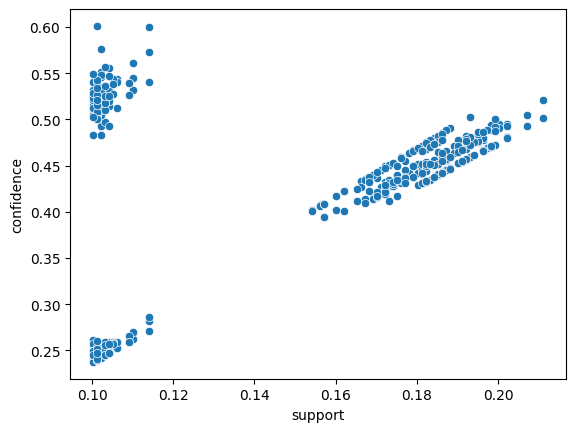

In [15]:
# Generate scatterplot confidence versus support
sns.scatterplot(x = "support", y = "confidence", data = filtered_rules)
plt.show()

**With scatterplot, we can have quick glimpse, where the boundary should be and what metric should be set to filter out the frequent itemsets.**

In [16]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354,0.232730
6,(Corn),(Apple),0.407407,0.383383,0.186186,0.457002,1.192025,0.029993,1.135579,0.271841
7,(Apple),(Corn),0.383383,0.407407,0.186186,0.485640,1.192025,0.029993,1.152096,0.261250
9,(Apple),(Dill),0.383383,0.398398,0.179179,0.467363,1.173104,0.026440,1.129478,0.239307
14,(Apple),(Kidney Beans),0.383383,0.408408,0.176176,0.459530,1.125173,0.019599,1.094587,0.180416
...,...,...,...,...,...,...,...,...,...,...
427,"(Kidney Beans, Yogurt)",(Nutmeg),0.194194,0.401401,0.101101,0.520619,1.297002,0.023151,1.248690,0.284177
428,"(Kidney Beans, Nutmeg)",(Yogurt),0.189189,0.420420,0.101101,0.534392,1.271088,0.021562,1.244779,0.263036
432,"(Milk, chocolate)",(Yogurt),0.211211,0.420420,0.104104,0.492891,1.172376,0.015307,1.142909,0.186402
433,"(Milk, Yogurt)",(chocolate),0.190190,0.421421,0.104104,0.547368,1.298862,0.023954,1.278255,0.284135


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


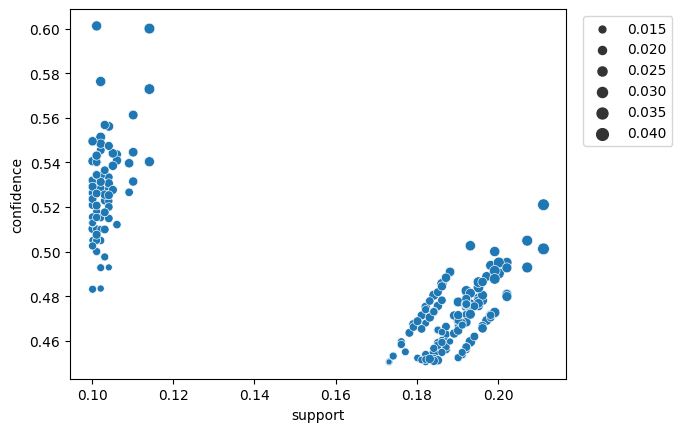

In [18]:
# Generate scatterplot confidence versus support

sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [19]:
# add extra another rule where support more than 0.2 for given itemset
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)&
                        (rules['support']>0.195)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
66,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,0.283728
67,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,0.288629
68,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,0.260247
69,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,0.254963
70,(Milk),(Butter),0.405405,0.420420,0.198198,0.488889,1.162857,0.027757,1.133960,0.235537
71,(Butter),(Milk),0.420420,0.405405,0.198198,0.471429,1.162857,0.027757,1.124909,0.241639
72,(Butter),(Nutmeg),0.420420,0.401401,0.198198,0.471429,1.174457,0.029441,1.132484,0.256294
73,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884,0.248150
74,(Onion),(Butter),0.403403,0.420420,0.197197,0.488834,1.162726,0.027598,1.133838,0.234584
75,(Butter),(Onion),0.420420,0.403403,0.197197,0.469048,1.162726,0.027598,1.123635,0.241472


In [21]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-411280391d08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
<ipython-input-21-411280391d08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

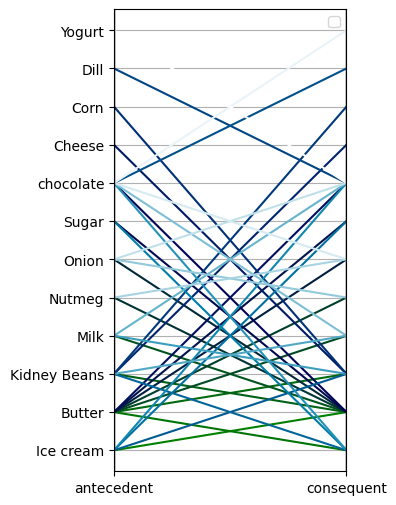

In [22]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(filtered_rules)
# Generate parallel coordinates plot
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

**From the plot it seems like the butter can be used as cross-selling with other products, it also acts as something to be offered with antecedents that is low. Thus, the customers are more likely to buy them if the butter are offered with cheaper price if they buy the antecedents that sold less in a store**